<a href="https://colab.research.google.com/github/vifro/Fasion_mnist_colab/blob/master/Assignment1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ConvNets using keras and the data set mnist_fastion

## Introduction to the problem.

## How it was solved

## What the results where. 

In [0]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.backend import set_image_data_format
from keras import backend as K # This is for generalizing channels, first or last.

## Get the sample.
First of all, we need to download the data set. The divide it in
*   Training      ~ 60-80 %. (Used: 5/7)
*   Validation  ~ 10-20%.  (Used: 1/7)
*   Test              ~ 10-20%.  (Used: 1/7)

**Validation** will be used for validating the development during training epochs. This will be our guide line in how
to tune our parameters and to decide which model perform best during training. 

The **Test** sample will be used to evaluate the finished model, since  a unseen/unbiased test sample must be
used to measure the performance on the model.

Also, a sanity check over the data. Scanning missing values, sizes etc. should be made. Mnist_fashion is known to be 
a complete set, which is why some parts are skipped. But converting the data to a Panda object will help to inspect it
further.

In [24]:
# If runnnig on multiple computers, check if channel is represented first or last.
# keras.backend.set_image_data_format('channels_first') 


"""
Loads the fashion_mnist datas set and
Split the data in to train, validation and test. 
    --Train 5/7      ~ 0.714% 
    --Validation 1/7 ~ 0.142%
    --Test 1/7       ~ 0.142%
      
        returns:
            X_train, y_train, X_validation, y_validation, X_test, y_test, labels
"""
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
type(X_train)

# Test is already done, 
random_seed = 2019 # Seed for reproducibility
train_size = float(5/6)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                train_size=train_size, 
                                                                random_state=random_seed)

# Create dictionary of target classes
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Inspect the sizes and a image to see that we have loaded the data set correctly.

train: (50000, 28, 28)
validation: (10000, 28, 28)
test: (10000, 28, 28)
Number of training samples: 50000
Number of validation samples: 10000
Number of test samples: 10000


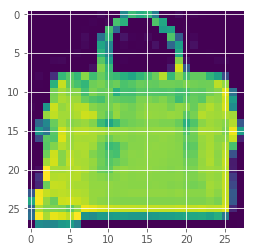

In [25]:
# Inspect the Shape 
print("train: " + str(X_train.shape))
print("validation: " + str(X_validation.shape))
print("test: " + str(X_test.shape))

# Number of samples
print("Number of training samples: " + str(len(y_train)))
print("Number of validation samples: " + str(len(y_validation)))
print("Number of test samples: " + str(len(y_test)))

# Check if each label is equally distributed. 




# Inspect Gray scaled image, with one channel (RGB has 3). 
plt.imshow(X_train[0])

# https://www.kaggle.com/zalando-research/fashionmnist informatin about the data


## Normalize
Since the input data consists of image pixels, ranging from 0-255, needs to be normalized. A neural network does not 
know that pixel values between 0-255 just represent the gray scale and will therefore threat them as different. This will 
mess up the activation functions so we want to normalize the data on a scale between 0-1. 


## Reshape 
The model will have an input, and the choice is up to the person building it. The data set contains grey scaled images, which 
will result in a 1 channel input. (RGB  = 3 channels). To make our input work with Keras - Conv2 layer, which is set to work with (batch size, height, width, channels ) or (batch size, channels,  height, width) we need to reshape the images to contain the channel value. In our case, 1.  

## Convert Labels
Labels are now a number representing 1 out of 10 different articles of clothing. The last layer in the model will be a softmax 
with 10 neurons, which means that we need to convert the labels to something that the model can understand. This is done
by creating a one- hot encoded labels where each answer is a vector with 0s, except for in the place of the correct answe which
has the value of 1. This is due to the softmax produces probabilities over the 10 output neurons, and we want to maximize the 
correct answer to be as close to 1 as possible. This means that all other values in the last layer will ( hopefully) be trained
to display 0. 

Also, when a one hot encoded label is used,  categorical_crossentropy is used. Otherwise sparse_categorical_crossentropy else

In [26]:

# Reshape data to fit model
# The channels depend on the backend, 
# it can be "channel first" or "channel last". 

nr_channels = 1 # Grey scaled = 1, RGB = 3

if K.image_data_format() == "channels_first":
    print("Channel first")
    X_train = X_train.reshape(len(X_train),
                              nr_channels,
                              X_train[0].shape[0],
                              X_train[0].shape[1])

    X_validation = X_validation.reshape(len(X_validation),
                                        nr_channels,
                                        X_validation[0].shape[0],
                                        X_validation[0].shape[1])

    X_test = X_test.reshape(len(X_test),
                            nr_channels,
                            X_test[0].shape[0],
                            X_test[0].shape[1])
    
    input_shape = (nr_channels,
                   X_train[0].shape[0], 
                   X_train[0].shape[1])
    
else:
    print("Channel Last")
    X_train = X_train.reshape(len(X_train), 
                              X_train[0].shape[0],
                              X_train[0].shape[1],
                              nr_channels)

    X_validation = X_validation.reshape(len(X_validation), 
                                        X_validation[0].shape[0],
                                        X_validation[0].shape[1], 
                                        nr_channels)

    X_test = X_test.reshape(len(X_test), 
                            X_test[0].shape[0],
                            X_test[0].shape[1], 
                            nr_channels)
    
    input_shape = (X_train[0].shape[0], 
                   X_train[0].shape[1], 
                   nr_channels)

print("Original Data ")
print("Train[max: " + str(X_train.max()) 
      + ", min: " + str(X_train.min()) +"]")
print("Validation[max: " + str(X_validation.max()) 
      + ", min: " + str(X_validation.min()) +"]")
print("Test[max: " + str(X_test.max()) 
      + ", min: " + str(X_test.min()) +"]")

# Normalize the data.
X_train = X_train.astype('float32') / 255
X_validation = X_validation.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print("\nNormalized")
print("Train[max: " + str(X_train.max()) 
      + ", min: " + str(X_train.min()) +"]")
print("Validation[max: " + str(X_validation.max()) 
      + ", min: " + str(X_validation.min()) +"]")
print("Test[max: " + str(X_test.max()) 
      + ", min: " + str(X_test.min()) +"]")    
    


print("\n Shape: ")
print("X_Train: " + str(X_train.shape))
print("X_validation: " + str(X_validation.shape))
print("X_test: " + str(X_test.shape))


# Inspect the answers
print("\nShape_old_answers: " + str(y_train.shape))
print("Example of current label: " + str(y_train[0])) # A number representing a label,

nr_classes = len(label_dict)
# One hot encode the labels of both train and test
y_train = np_utils.to_categorical(y_train, nr_classes)
y_validation = np_utils.to_categorical(y_validation, nr_classes)
y_test = np_utils.to_categorical(y_test, nr_classes)


# New shape, one hot vector with 1 representing the label.
print("Shape_new_answers:" + str(y_train.shape)) 
print("Example of one hot: " + str(y_train[0])) 


Channel Last
Original Data 
Train[max: 255, min: 0]
Validation[max: 255, min: 0]
Test[max: 255, min: 0]

Normalized
Train[max: 1.0, min: 0.0]
Validation[max: 1.0, min: 0.0]
Test[max: 1.0, min: 0.0]

 Shape: 
X_Train: (50000, 28, 28, 1)
X_validation: (10000, 28, 28, 1)
X_test: (10000, 28, 28, 1)

Shape_old_answers: (50000,)
Example of current label: 8
Shape_new_answers:(50000, 10)
Example of one hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Saving model to google drive.
## Tutorial. 

In [0]:
google_drive = False

if google_drive:
    # Step 1: Install PyDrive library into Google Colab notebook.
    !pip install -U -q PyDrive
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive 
    from google.colab import auth 
    from oauth2client.client import GoogleCredentials
    
    # OR
    # Import drive API
    from google.colab import drive
    drive.mount('/content/gdrive/', force_remount=True)
    
    # And 
    # Specify which folder you want to access and see that it works.
    !ls /content/gdrive/'My Drive'/'Colab Notebooks'/'Assignment1'

    root_dir = "/content/gdrive/'My Drive'/'Colab Notebooks'/'Assignment1'"



# Use snippets. 
dont_use = False
if dont_use:
    # Step 2:  Authenticate and create the PyDrive client
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    
    # Step 3: Save Model or weights on google drive and create on Colab directory in Google Drive
    model.save('model.h5')
    model_file = drive.CreateFile({'title' : 'model.h5'})
    model_file.SetContentFile('model.h5')
    model_file.Upload()
    
    # Step 4: Download to google drive
    drive.CreateFile({'id': model_file.get('id')})
    
    # Step5: 
    file_obj = drive.CreateFile({'id': '16zbkEN4vqnPvIOvLMF1IaXKYCq5g3Yln'})

## Check content on drive.

# Loading as panda object
## Inspect the data and see if there is anything suspicious

Check for missing values etc. 


In [0]:
# https://stackoverflow.com/questions/44102375/numpy-array-to-pandas-data-frame-of-x-y-coordinates


# Model generation.
Loading different models and weights and training them. Theses models will then be connected to a fully connected layer

In [0]:
from keras.layers import Input, Dense ,Conv2D,  MaxPooling2D, ZeroPadding2D, Dense, Flatten, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.activations import relu, softmax, sigmoid
from keras.optimizers import Adam, SGD
# categorical_crossentropy for one hot, sparse_categorical_crossentropy else
from keras.losses import categorical_crossentropy 
from keras import regularizers
from keras.models import model_from_json

# For saving the weights
from __future__ import absolute_import, division, print_function
import os


## Imports 
And inpu shape for all conv-nets

In [0]:
from keras.layers import Input, Dense ,Conv2D,  MaxPooling2D, ZeroPadding2D, Dense, Flatten, BatchNormalization, Dropout, Activation
from keras.models import Model, Sequential
from keras.activations import relu, softmax, sigmoid
from keras.optimizers import Adam, SGD
# categorical_crossentropy for one hot, sparse_categorical_crossentropy else
from keras.losses import categorical_crossentropy 

from keras.models import model_from_json

# For saving the weights
from __future__ import absolute_import, division, print_function
import os


## Dynamic CNN. 

In [0]:
def buildCNN(input_shape, nr_classes, dropout_rate=0.2, kernel_size=(3, 3), strides=(1,1), 
             optimizer=Adam, lr=0.001, Bn=False, Zp= False, 
             activations=['relu', 'relu'], loss=categorical_crossentropy, 
             metrics=[''], conv_layer=[32, 64], hidden_layer=[128],reg=False):
    """
    Specify how many layers your cnn should contain, and how many hidden layers.
    Add more information if you dont want standard settings.
        Input: 
            dropout_rate:
                Dropout rate, added before every fully connected.

            kernel_size:
                The kernel size (window size) for the CNN

            strides:
                Strides, the step size for the kernel.

            optimizer:
                Optimizer for compiling, eg. Adam, SGD, Rmstop etc. 

            lr:
                Initial learning rate for the model

            Bn:
                If Batch normalization should be used

            Zp:
                If Zero padding should be used

            activations:
                List of activation functions, if empty. Relu.

            loss:
                Loss function, binary, cross_entropy etc.

            metrics:
                list of strings describing what metric to use

            conv_layer:
                The size and how many convolutional layers. 

            hidden_layer:
                Size and number of hidden layers

            nr_classes:
                Number of output neurons.
        Return:
            A  compiled model with specified input values.

            FIX CALLBACK  FOR EARLY STOPPING SO THAT EVERY FUCKING MODEL CAN BE
            EVALUATED.

    """
    # If L1 and L2 reg should be used
    if reg:
        kernel_reg=regularizers.l1_l2(l1=0.0001, l2=0.0001)
    else:
        kernel_reg=None
    
    # Set the activations for the different parts of the CNN
    if activations:
        conv_act = activations[0] # Activation for convolutional layers
        hid_act = activations[1] # Activation for hidden layer
                            
    model = Sequential()
    
    # For each element in the conv_layer, Create one.
    for index, filters in enumerate(conv_layer):
        if Zp:
            model.add(ZeroPadding2D((1,1), input_shape=input_shape))
            model.add(Conv2D(filters, kernel_size=kernel_size, strides=strides,
                             kernel_regularizer=kernel_reg, 
                             name="conv"+str(index)))
        else:
            model.add(Conv2D(filters, kernel_size=kernel_size, strides=strides,
                             input_shape=input_shape, name="conv"+str(index)))
        if Bn:
               model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_"+str(index)))
    
    # Flatted output, so the fully connected gets the right dimensions. 
    model.add(Flatten())
    
    # Drop out rate
    model.add(Dropout(dropout_rate))
    
    # Create n hidden layers.
    for index, elem in enumerate(hidden_layer):
        model.add(Dense(elem, activation=hid_act, name="Dense"+str(elem) 
                  + "_" + str(index)))
    
    # Add the output
    model.add(Dense(nr_classes, activation=softmax, name="softmax_output"))
    
    # Compile before returning 
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)
    
    return model
    



Function for visualing the accuracy and loss

In [0]:
import matplotlib
from sklearn.metrics import classification_report


def classification_and_plot(H, testY, preds, labelNames, N):
    """
    This class if for printing accuracy, loss and a 
        - classification report where the exact accuracy for each
          label is presented.
          
        INPUT
            - H: history from a fit session
            - testY: The correct answers
            - preds: The predictions made by the model.
            - labelNames: The name of each label
            - N: Number of epochs run when fitting the data.
    """
    
    print("[INFO] evaluating network...")
    print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
        target_names=labelNames.values()))


    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    #plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    #plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["categorical_accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_categorical_accuracy"], label="val_acc")
    plt.title("Training  Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()
    plt.savefig("plot.png")
    
    
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()




## Testing kernel size and strides 
### Visual Comparison 



*   kernel_size(3, 3) with stride (1, 1) 
*   kernel_size(3, 3) with stride (2, 2)
*   kernel_size(4, 4) with stride (1, 1)
*   kernel_size(4, 4) with stride (2, 2)

In [32]:

opt = Adam(0.001)
# Check difference of kernel sizes and strides.
model_3_1 = buildCNN(input_shape, nr_classes, dropout_rate=0.5, kernel_size=(3, 3), strides=(1,1),
                     optimizer=opt, lr=0.001, Bn=False, Zp= False, activations=['relu', 'relu'],
                     loss=categorical_crossentropy, metrics=['categorical_accuracy'],
                     conv_layer=[32, 64], hidden_layer=[128])
model_3_1.summary()
model_3_2 = buildCNN(input_shape, nr_classes, dropout_rate=0.5, kernel_size=(3, 3), strides=(2,2),
                     optimizer=opt, lr=0.001, Bn=False, Zp= False, activations=['relu', 'relu'],
                     loss=categorical_crossentropy, metrics=['categorical_accuracy'],
                     conv_layer=[32, 64], hidden_layer=[128])

model_4_1 = buildCNN(input_shape, nr_classes, dropout_rate=0.5, kernel_size=(4, 4), strides=(1,1),
                     optimizer=opt, lr=0.001, Bn=False, Zp= False, activations=['relu', 'relu'],
                     loss=categorical_crossentropy, metrics=['categorical_accuracy'],
                     conv_layer=[32, 64], hidden_layer=[128])


model_4_2 = buildCNN(input_shape, nr_classes, dropout_rate=0.5, kernel_size=(4, 4), strides=(2,2),
                     optimizer=opt, lr=0.001, Bn=False, Zp= False, activations=['relu', 'relu'],
                     loss=categorical_crossentropy, metrics=['categorical_accuracy'],
                     conv_layer=[32, 64], hidden_layer=[128])

BATCH_SIZE = 32
EPOCHS = 20

# TRAIN
history1 = model_3_1.fit(X_train, y_train, 
                       epochs = EPOCHS,
                       batch_size=BATCH_SIZE,
                       validation_data = (X_validation, y_validation))

history2 = model_3_2.fit(X_train, y_train, 
                       epochs = EPOCHS,
                       batch_size=BATCH_SIZE,
                       validation_data = (X_validation, y_validation))

history3 = model_4_1.fit(X_train, y_train, 
                       epochs = EPOCHS,
                       batch_size=BATCH_SIZE,
                       validation_data = (X_validation, y_validation))

history4 = model_4_2.fit(X_train, y_train, 
                       epochs = EPOCHS,
                       batch_size=BATCH_SIZE,
                       validation_data = (X_validation, y_validation))


# Print accuracy
loss1, acc1 = model_3_1.evaluate(X_test, y_test)
loss2, acc2 = model_3_2.evaluate(X_test, y_test)
loss3, acc3 = model_4_1.evaluate(X_test, y_test)
loss4, acc4 = model_4_2.evaluate(X_test, y_test)


print("Trained model1, accuracy: {:5.2f}%".format(100*acc1))
print("Trained model2, accuracy: {:5.2f}%".format(100*acc2))
print("Trained model3, accuracy: {:5.2f}%".format(100*acc3))
print("Trained model4, accuracy: {:5.2f}%".format(100*acc4))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 13, 13, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_22 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
__________

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.89      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.87      0.89      0.88      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.76      0.75      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



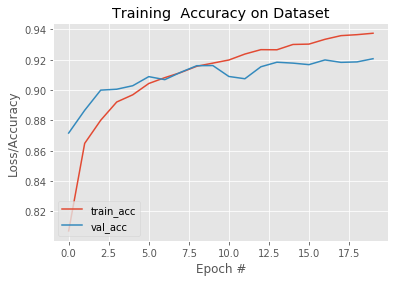

<Figure size 432x288 with 0 Axes>

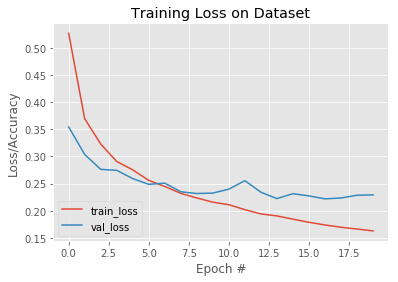

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.73      0.79      1000
     Trouser       1.00      0.95      0.97      1000
    Pullover       0.71      0.87      0.78      1000
       Dress       0.85      0.88      0.86      1000
        Coat       0.75      0.74      0.75      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.60      0.56      0.58      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.92      0.94      0.93      1000

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



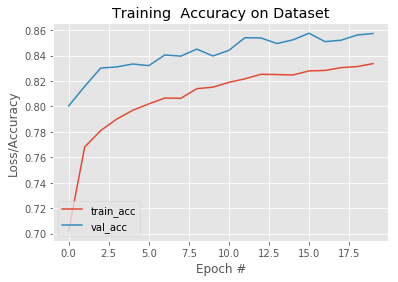

<Figure size 432x288 with 0 Axes>

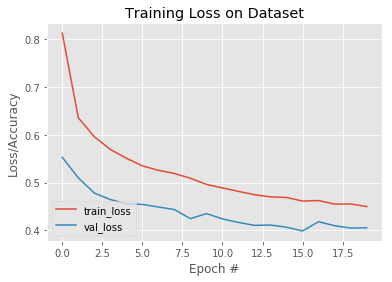

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.69      0.72      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



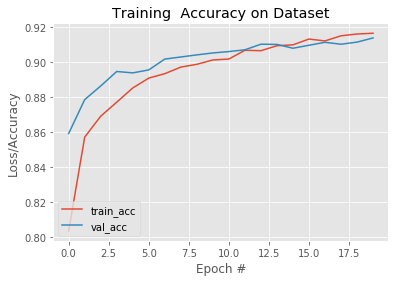

<Figure size 432x288 with 0 Axes>

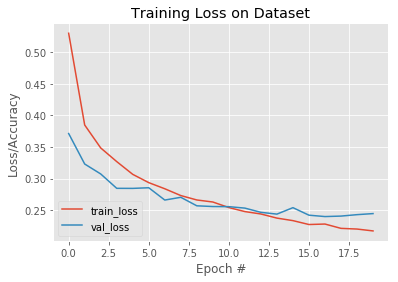

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.77      0.80      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.69      0.86      0.77      1000
       Dress       0.84      0.93      0.88      1000
        Coat       0.92      0.48      0.64      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.59      0.73      0.66      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



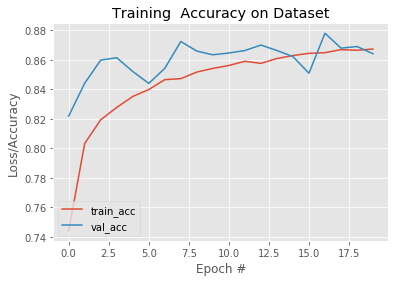

<Figure size 432x288 with 0 Axes>

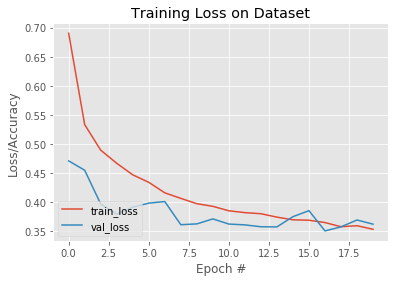

In [33]:
# Visualize
classification_and_plot(history1, y_test, model_3_1.predict(X_test), 
                        label_dict, history1.epoch[-1] + 1)
classification_and_plot(history2, y_test, model_3_2.predict(X_test), 
                        label_dict, history2.epoch[-1] + 1)
classification_and_plot(history3, y_test, model_4_1.predict(X_test), 
                        label_dict, history3.epoch[-1] + 1)
classification_and_plot(history4, y_test, model_4_2.predict(X_test), 
                        label_dict, history4.epoch[-1] + 1)

##  Conclusion

### Strides: 
First off we can easily see that the strides and kernel sizes effect both accuracy and learning rate. The strides of (2, 2) affect the accuracy in a negative way. We have small images, and strides of 2 makes our represenations miss important features. The overall best performer was the kernel size of (3, 3) and strides(2, 2).

### Overfitting
From this run we also see that the system is not overfitting to much, which implies that our model could
be more complex. Since we have not used any of the techniques to reduce overfitting, improving training accuracy gives us something to work with and will probably also yield in a better result. 



##  Trying more complex models w/out Batch normalization and ZeroPadding
Lets extend our model to a 3 Layer convolutional with the best performing strides and kernel size.

## Basic vs Batchnormalization

In [34]:
model_basic = buildCNN(input_shape, nr_classes, dropout_rate=0.5, kernel_size=(3, 3), 
                       strides=(1,1),optimizer=opt, lr=0.001, Bn=False, 
                       Zp= False, activations=['relu', 'relu'],
                       loss=categorical_crossentropy, 
                       metrics=['categorical_accuracy'],
                       conv_layer=[32, 64, 128], 
                       hidden_layer=[128])

model_normalization = buildCNN(input_shape, nr_classes, dropout_rate=0.5, kernel_size=(3, 3), 
                               strides=(1,1),optimizer=opt, lr=0.001, Bn=True, 
                               Zp= True, activations=['relu', 'relu'],
                               loss=categorical_crossentropy, 
                               metrics=['categorical_accuracy'],
                               conv_layer=[32, 64, 128], 
                               hidden_layer=[128])

model_basic.summary()
model_normalization.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 13, 13, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_30 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 5, 5, 64)          0         
_________________________________________________________________
conv2 (Conv2D)               (None, 3, 3, 128)         73856     
__________

### Train

In [35]:
EPOCHS = 20
BATCH_SIZE = 32

history_basic = model_basic.fit(X_train, y_train, 
                                epochs = EPOCHS,
                                batch_size=BATCH_SIZE,
                                validation_data = (X_validation, y_validation))

history_normalization = model_normalization.fit(X_train, y_train, 
                                                epochs = EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                validation_data = (X_validation, y_validation))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 340us/step - loss: 0.6400 - categorical_accuracy: 0.7635 - val_loss: 0.4515 - val_categorical_accuracy: 0.8329
Epoch 2/20
50000/50000 [==============================] - 15s 305us/step - loss: 0.4659 - categorical_accuracy: 0.8309 - val_loss: 0.3955 - val_categorical_accuracy: 0.8545
Epoch 3/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.4144 - categorical_accuracy: 0.8491 - val_loss: 0.3516 - val_categorical_accuracy: 0.8699
Epoch 4/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.3830 - categorical_accuracy: 0.8604 - val_loss: 0.3391 - val_categorical_accuracy: 0.8750
Epoch 5/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.3625 - categorical_accuracy: 0.8672 - val_loss: 0.3230 - val_categorical_accuracy: 0.8781
Epoch 6/20
50000/50000 [==============================] - 15s 304us/step - loss: 0.34

Visualize the 

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.78      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.81      0.83      1000
       Dress       0.88      0.88      0.88      1000
        Coat       0.80      0.84      0.82      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.65      0.74      0.70      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



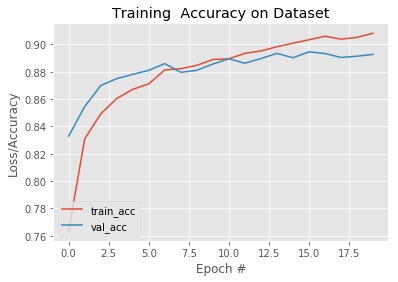

<Figure size 432x288 with 0 Axes>

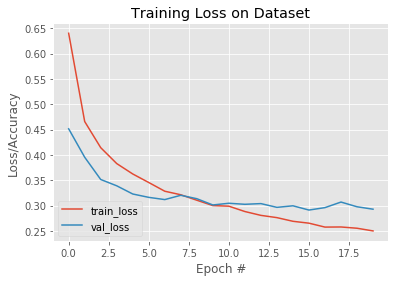

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.89      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.87      0.91      0.89      1000
       Dress       0.94      0.91      0.93      1000
        Coat       0.89      0.88      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.78      0.78      1000
     Sneaker       0.94      0.99      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



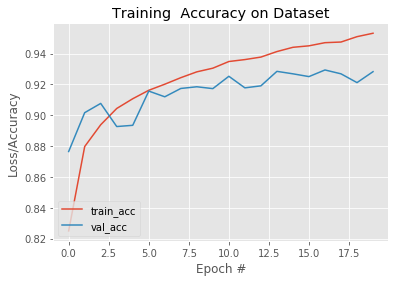

<Figure size 432x288 with 0 Axes>

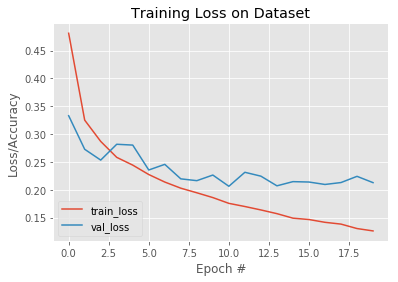

In [36]:
classification_and_plot(history_basic, y_test, model_basic.predict(X_test), 
                        label_dict, history_basic.epoch[-1] + 1)

classification_and_plot(history_normalization, y_test,
                        model_normalization.predict(X_test), 
                        label_dict, history_normalization.epoch[-1] + 1)

# Fine tuning 
There are multiple ways to fine tune hyper parameters. Lets see if the learning rate is to big for the model to get even better results. So we run the same process again, with some more epochs.. But with a learning rate decay.

In [37]:
# Reduce the learning rate and run for a few epochs.
EPOCHS = 30
BATCH_SIZE = 32 # increase for more generalized learning and decreased accuracy

learning_rate = 0.001
decay_rate = learning_rate / EPOCHS
opt = Adam(lr=learning_rate, epsilon=None, decay=decay_rate)

model_normalization_decay = buildCNN(input_shape, nr_classes, dropout_rate=0.5, 
                                     kernel_size=(3, 3), strides=(1,1), 
                                     optimizer=opt, lr=0.001, Bn=True, Zp=True, 
                                     activations=['relu', 'relu'],
                                     loss=categorical_crossentropy, 
                                     metrics=['categorical_accuracy'],
                                     conv_layer=[32, 64, 128], 
                                     hidden_layer=[128])


history_normalization_decay = model_normalization_decay.fit(X_train, y_train, 
                                                epochs = EPOCHS,
                                                batch_size=BATCH_SIZE,
                                                validation_data = (X_validation, y_validation))


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 25s 492us/step - loss: 0.4939 - categorical_accuracy: 0.8216 - val_loss: 0.3515 - val_categorical_accuracy: 0.8670
Epoch 2/30
50000/50000 [==============================] - 22s 445us/step - loss: 0.3292 - categorical_accuracy: 0.8792 - val_loss: 0.2678 - val_categorical_accuracy: 0.9012
Epoch 3/30
50000/50000 [==============================] - 22s 443us/step - loss: 0.2807 - categorical_accuracy: 0.8968 - val_loss: 0.2862 - val_categorical_accuracy: 0.8955
Epoch 4/30
50000/50000 [==============================] - 22s 444us/step - loss: 0.2549 - categorical_accuracy: 0.9046 - val_loss: 0.2348 - val_categorical_accuracy: 0.9155
Epoch 5/30
50000/50000 [==============================] - 22s 444us/step - loss: 0.2302 - categorical_accuracy: 0.9154 - val_loss: 0.2494 - val_categorical_accuracy: 0.9080
Epoch 6/30
50000/50000 [==============================] - 22s 444us/step - loss: 0.21

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.86      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.91      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.91      0.85      0.88      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.78      0.80      0.79      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.99      0.96      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



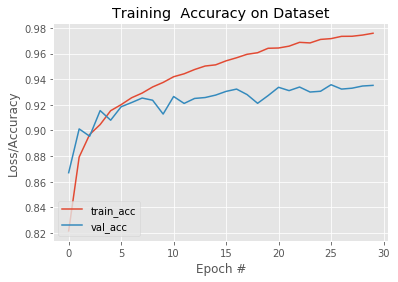

<Figure size 432x288 with 0 Axes>

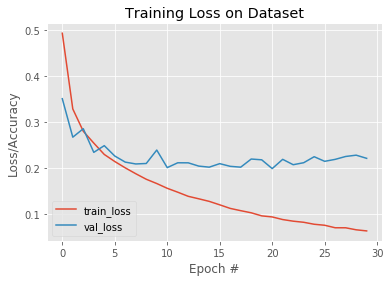

10000/10000 [==============================] - 1s 133us/step
Trained final model, accuracy: 92.61%


In [43]:
classification_and_plot(history_normalization_decay, y_test,
                        model_normalization_decay.predict(X_test), 
                        label_dict, history_normalization_decay.epoch[-1] + 1)


loss, acc = model_normalization_decay.evaluate(X_test, y_test)


print("Trained final model, accuracy: {:5.2f}%".format(100*acc))

# Conclusion

By inspecting the values of recall, precision and f1. We can clearly see that the model has no trouble at all classifying trousers but only 80% on shirts.

## Reaching Final model
* **Step1:** Trying a basic model with different strides and kernel sizes ( Should have tried more for being correct)
* **Step2:**  Trying to build a more complex model to overfit the data
* **Step3:**  Trying to Normalize to reduce the overfitting

## What to do next.
* Try L1 and L2  regularization on each layer and see if we reduce the overfitting of the validation data.





In [46]:
# Reduce the learning rate and run for a few epochs.
EPOCHS = 30
BATCH_SIZE = 32 # increase for more generalized learning and decreased accuracy

learning_rate = 0.001
decay_rate = learning_rate / EPOCHS
opt = Adam(lr=learning_rate, epsilon=None, decay=decay_rate)

model_normalization_decay_l1_l2 = buildCNN(input_shape, nr_classes, dropout_rate=0.5, 
                                           kernel_size=(3, 3), strides=(1,1), 
                                           optimizer=opt, lr=0.001, Bn=True, Zp=True, 
                                           activations=['relu', 'relu'],
                                           loss=categorical_crossentropy, 
                                           metrics=['categorical_accuracy'],
                                           conv_layer=[32, 64, 128], 
                                           hidden_layer=[128], reg=True)


history_normalization_decay_l1_l2 = model_normalization_decay_l1_l2.fit(X_train, 
                                                                        y_train, 
                                                                        epochs = EPOCHS,
                                                                        batch_size=BATCH_SIZE,
                                                                        validation_data = (X_validation, y_validation))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 27s 537us/step - loss: 0.7577 - categorical_accuracy: 0.8209 - val_loss: 0.6059 - val_categorical_accuracy: 0.8592
Epoch 2/30
50000/50000 [==============================] - 23s 468us/step - loss: 0.5454 - categorical_accuracy: 0.8736 - val_loss: 0.4724 - val_categorical_accuracy: 0.8949
Epoch 3/30
50000/50000 [==============================] - 23s 466us/step - loss: 0.4936 - categorical_accuracy: 0.8839 - val_loss: 0.4378 - val_categorical_accuracy: 0.9017
Epoch 4/30
50000/50000 [==============================] - 23s 468us/step - loss: 0.4554 - categorical_accuracy: 0.8944 - val_loss: 0.4451 - val_categorical_accuracy: 0.8942
Epoch 5/30
50000/50000 [==============================] - 23s 469us/step - loss: 0.4286 - categorical_accuracy: 0.8994 - val_loss: 0.4161 - val_categorical_accuracy: 0.8995
Epoch 6/30
50000/50000 [==============================] - 23s 468us/step - loss: 0.40

[INFO] evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.91      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.91      0.89      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.88      0.87      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.81      0.71      0.76      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.98      0.95      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



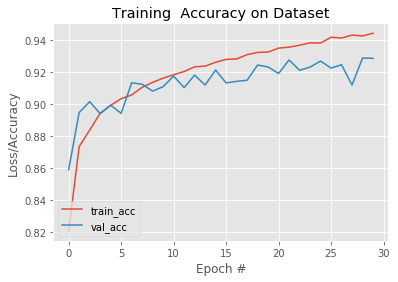

<Figure size 432x288 with 0 Axes>

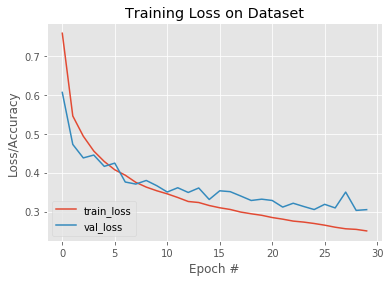

In [47]:
classification_and_plot(history_normalization_decay_l1_l2, y_test,
                        model_normalization_decay_l1_l2.predict(X_test), 
                        label_dict, history_normalization_decay_l1_l2.epoch[-1] + 1)




# FINAL
This is not a perfect model. A lot of things could have been improved and tried. 
* Learning rates
* Different optimizers
* Different Dropout
* Different activation functions
* etc
* Train for more epochs with a callback function for ealy stopping.
* Add one more layers and prevent overfitting on that.
## Display the results on the test data.

In [49]:
loss, acc = model_normalization_decay_l1_l2.evaluate(X_test, y_test)
print("Trained final model, test accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 150us/step
Trained final model, test accuracy: 92.21%
